In [1]:
### Survival Analysis in R ###
## install packages
#install.packages("survival")
#install.packages("ranger")
#install.packages("ggfortify")
#install.packages("lubridate") 
#install.packages("flexsurv")

In [2]:
#R.Version()

In [3]:
### Survival Analysis in R ###
## Import prostate_cancer as prost
prost <- read.csv("prostate_cancer.txt", header=FALSE, sep =" ")

# Providing column names
colnames(prost) = c("patient", "treatment", "time", "status", "age", "sh", "size", "index")
head(prost)

,patient,treatment,time,status,age,sh,size,index
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,1,1,65,0,67,13.4,34,8
2,2,2,61,0,60,14.6,4,10
3,3,2,60,0,77,15.6,3,8
4,4,1,58,0,64,16.2,6,9
5,5,2,51,0,65,14.1,21,9
6,6,1,51,0,61,13.5,8,8


In [4]:
### The fundamental Surv function
library(survival)
Surv(prost$time, prost$status)

 [1] 65+ 61+ 60+ 58+ 51+ 51+ 14  43+ 16+ 52+ 59  55+ 68+ 51   2+ 67+ 66+ 66  28+
[20] 50  69  67  65+ 24+ 45+ 64+ 61+ 26  42  57+ 70+  5+ 54+ 36  70  67+ 23+ 52 
[39] 65+ 24  45+ 64+ 61  21  22  37+ 51  12+ 67+ 61+ 66  65+ 50  35  67  65+ 33+
[58] 45+ 62+ 61+ 36  42  57+

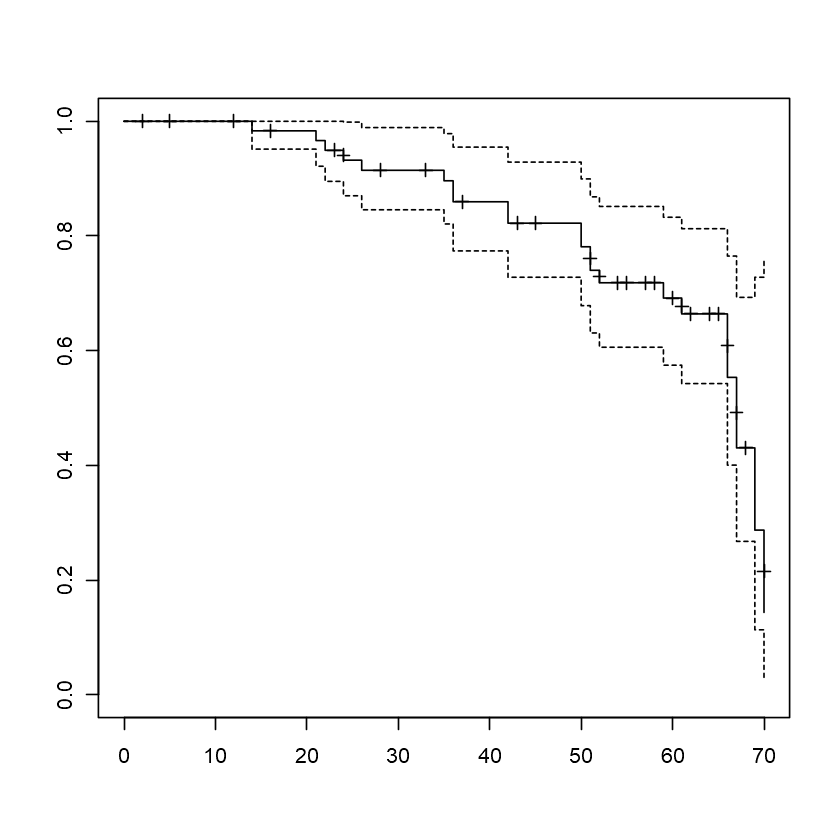

In [5]:
# Simple Kaplan Meier plot
mykm1 <- survfit(Surv(time, status) ~ 1, data = prost)
plot(mykm1, mark.time = TRUE)

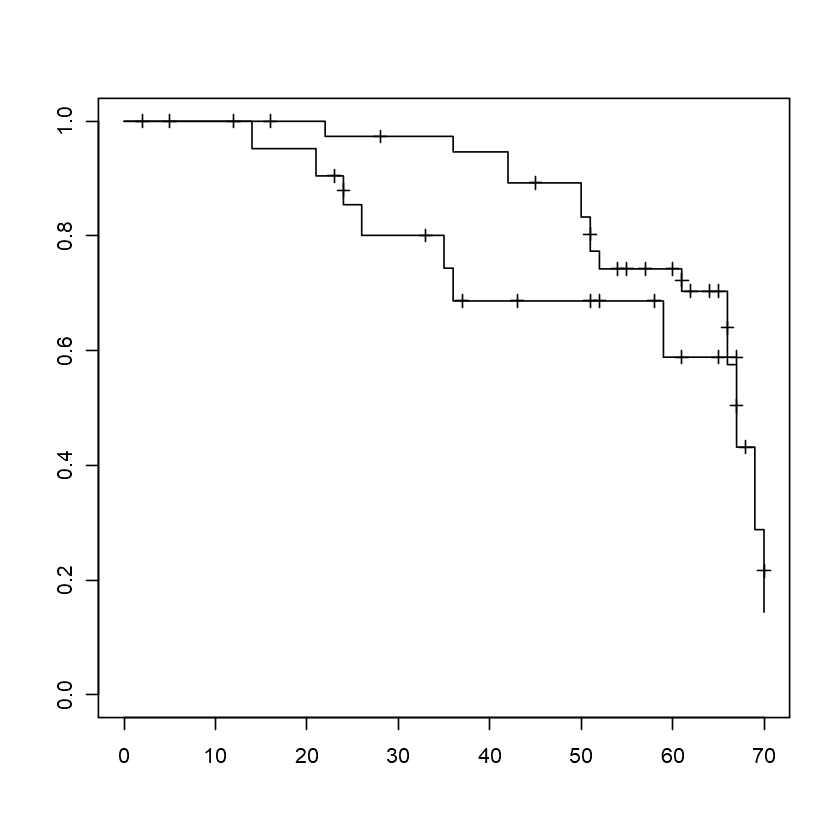

In [6]:
# Stratified KM plot
mykm2 <- survfit(Surv(time, status) ~ treatment, data = prost) ## alternative 2 line chart
plot(mykm2, mark.time = TRUE)

Loading required package: ggplot2



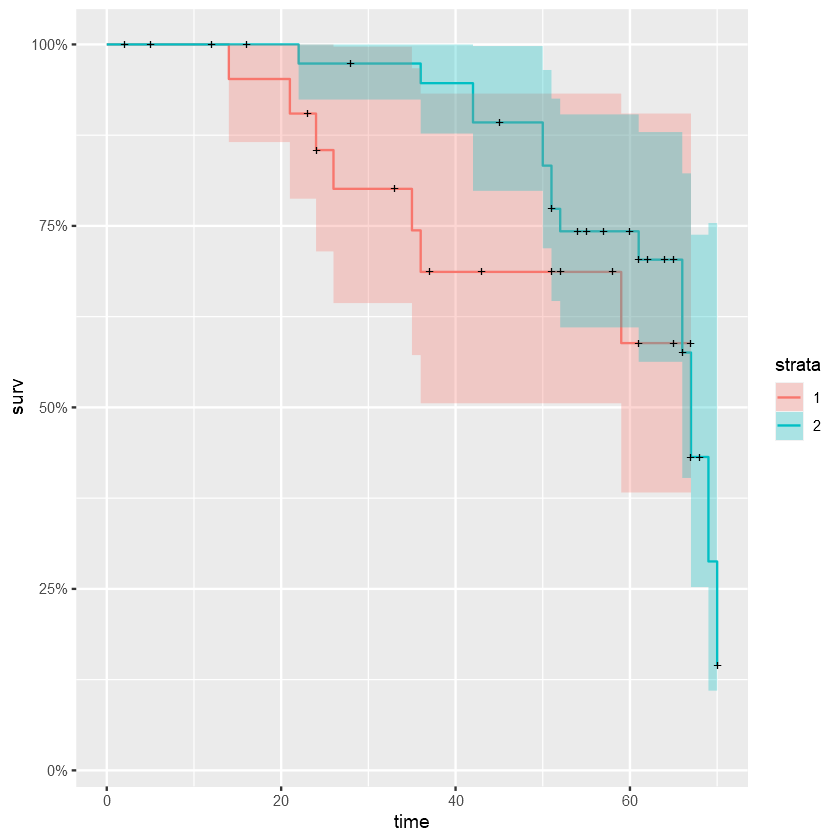

In [7]:
# Advanced plot
library(ggfortify)
autoplot(mykm2)

In [8]:
# Log Rank Test to check if the two treatments are significantly different 
# In this case we get a p value of 0.3 which is not significant
survival::survdiff(survival::Surv(prost$time, prost$status) ~ prost$treatment)

Call:
survival::survdiff(formula = survival::Surv(prost$time, prost$status) ~ 
    prost$treatment)

                   N Observed Expected (O-E)^2/E (O-E)^2/V
prost$treatment=1 23        7     5.13     0.686     0.958
prost$treatment=2 40       16    17.87     0.197     0.958

 Chisq= 1  on 1 degrees of freedom, p= 0.3 

In [9]:
### Cox Proportional Hazards Model - coxph function!
### Cox takes into account the covariates like gender, age, weight, occupation, treatment, other diseases etc
### It takes into consideration the baseline hazard + the covariate part (that is exponential), the changes of risk based on covariates
cox <- coxph(Surv(time, status) ~ treatment + age + sh+ size + index, data = prost)
summary(cox)

Call:
coxph(formula = Surv(time, status) ~ treatment + age + sh + size + 
    index, data = prost)

  n= 63, number of events= 23 

              coef exp(coef) se(coef)      z Pr(>|z|)    
treatment -0.69695   0.49810  0.53471 -1.303   0.1924    
age       -0.08361   0.91979  0.03692 -2.265   0.0235 *  
sh        -0.23664   0.78927  0.18511 -1.278   0.2011    
size       0.06786   1.07021  0.02833  2.395   0.0166 *  
index      0.77410   2.16865  0.18803  4.117 3.84e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

          exp(coef) exp(-coef) lower .95 upper .95
treatment    0.4981     2.0076    0.1747    1.4206
age          0.9198     1.0872    0.8556    0.9888
sh           0.7893     1.2670    0.5491    1.1345
size         1.0702     0.9344    1.0124    1.1313
index        2.1686     0.4611    1.5002    3.1350

Concordance= 0.866  (se = 0.037 )
Likelihood ratio test= 38.4  on 5 df,   p=3e-07
Wald test            = 26.47  on 5 df,   p=7e-05
Score (logrank

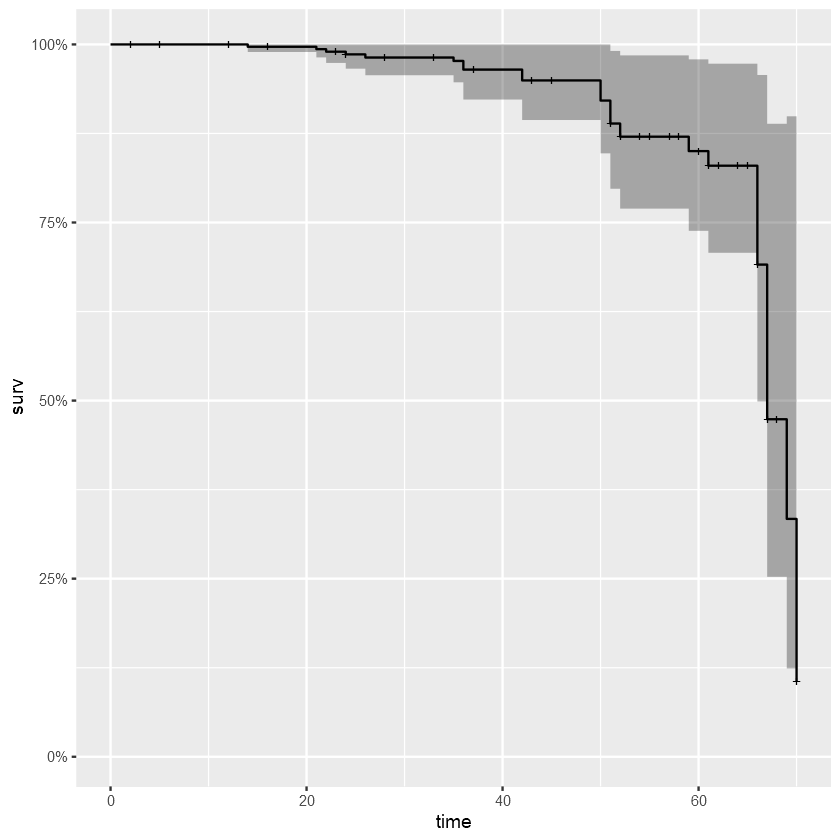

In [10]:
# Getting a plot of the model 
#autoplot(survfit(cox))
#alternative way to plot would be
coxfit = survfit(cox)
autoplot(coxfit)

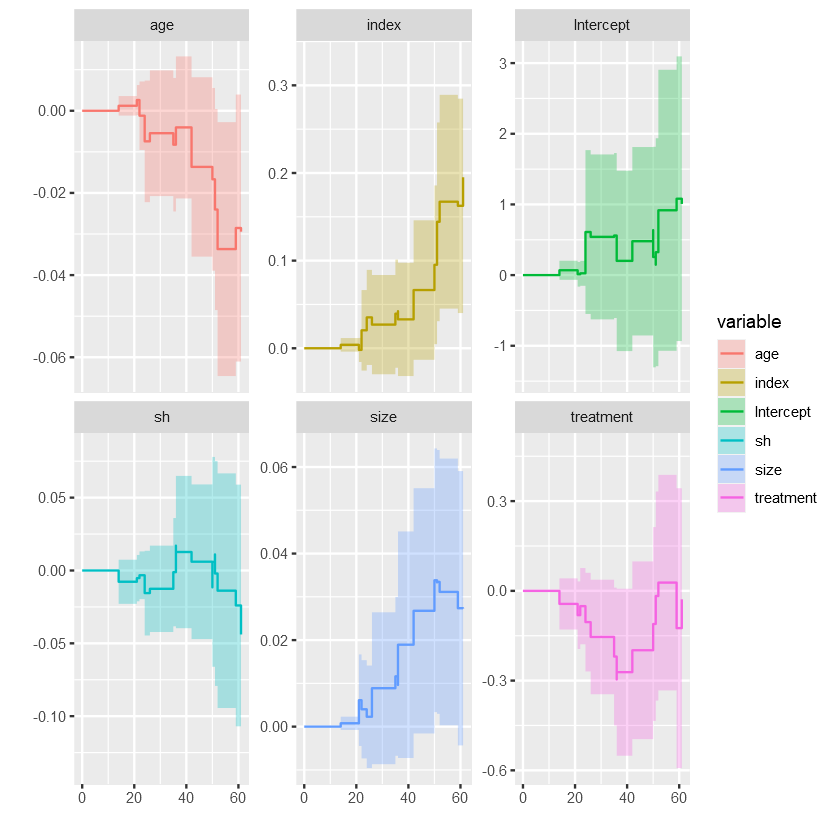

In [11]:
# Aalen's additive regression considers the time-based changes in covariate effects
# Can visualize how the covariates change over time
# Results at the tail end of the dataset can get inaccurate (risk)
aalen <- aareg(Surv(time, status) ~ treatment + age + sh+ size + index, data = prost)
autoplot(aalen)

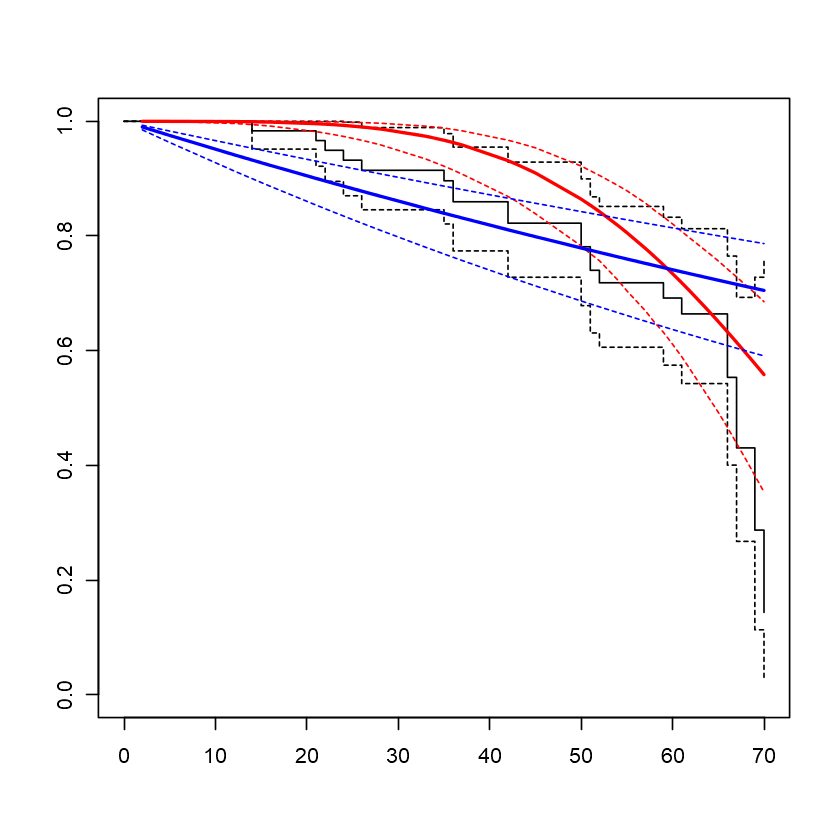

In [12]:
# Parametric models
library(flexsurv)
weib_mod = flexsurvreg(Surv(time, status) ~ treatment + age + sh+ size + index, data = prost, dist = "weibull")
exp_mod = flexsurvreg(Surv(time, status) ~ treatment + age + sh+ size + index, data = prost, dist = "exp")
plot(weib_mod)
lines(exp_mod, col="blue")

In [13]:
#Using another dataset - Example 2

In [14]:
### Exercise Cox Prop Hazards
# Cox Proportional Hazards
cox <- coxph(Surv(futime, status) ~ trt + stage + bili + riskscore, data = udca1)
summary(cox)

Call:
coxph(formula = Surv(futime, status) ~ trt + stage + bili + riskscore, 
    data = udca1)

  n= 169, number of events= 72 
   (1 observation deleted due to missingness)

              coef exp(coef) se(coef)      z Pr(>|z|)    
trt       -1.01636   0.36191  0.25628 -3.966 7.31e-05 ***
stage      0.03453   1.03514  0.28768  0.120   0.9045    
bili       0.08971   1.09385  0.07827  1.146   0.2518    
riskscore  0.30950   1.36275  0.16142  1.917   0.0552 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

          exp(coef) exp(-coef) lower .95 upper .95
trt          0.3619     2.7631    0.2190    0.5981
stage        1.0351     0.9661    0.5890    1.8192
bili         1.0939     0.9142    0.9383    1.2752
riskscore    1.3628     0.7338    0.9932    1.8699

Concordance= 0.684  (se = 0.031 )
Likelihood ratio test= 30.32  on 4 df,   p=4e-06
Wald test            = 29.86  on 4 df,   p=5e-06
Score (logrank) test = 31.47  on 4 df,   p=2e-06


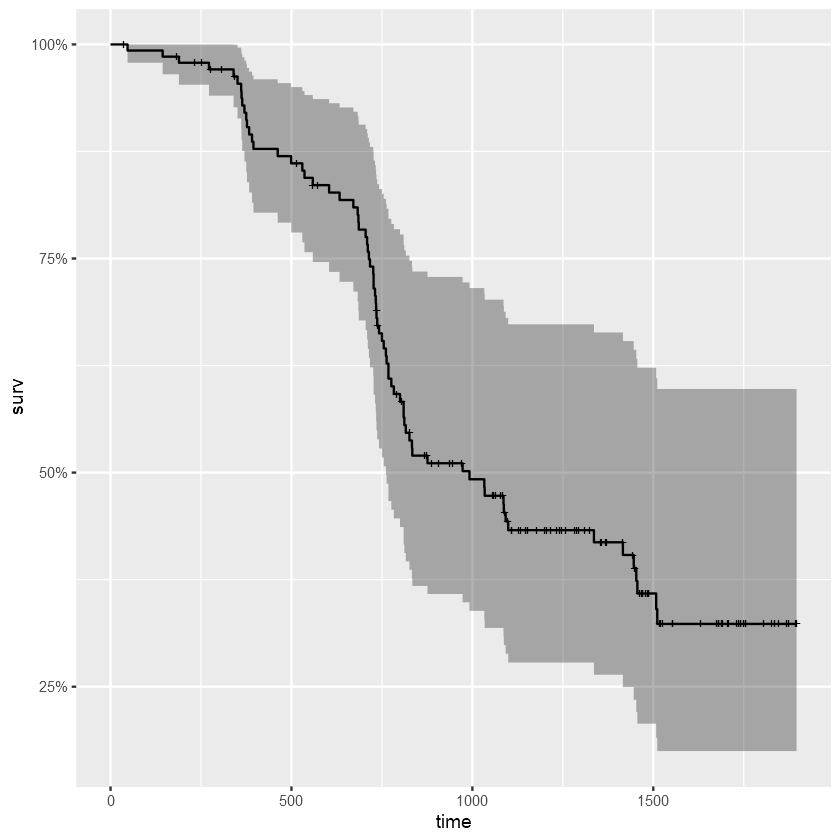

In [15]:
# Getting a plot of the model 
autoplot(survfit(cox))

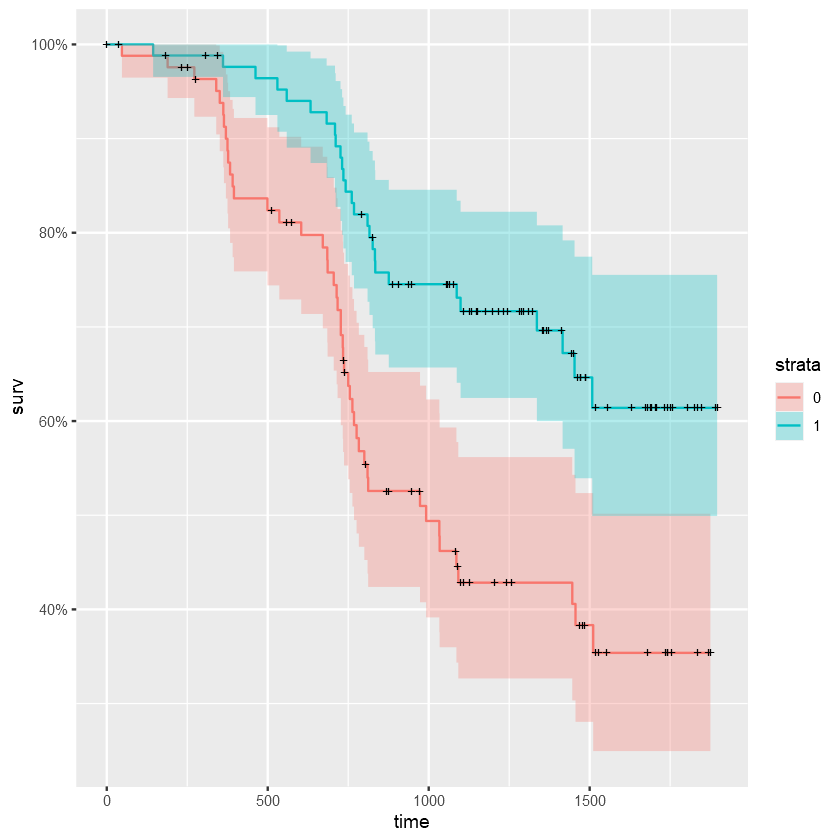

In [16]:
# Standard Kaplan Meier plot to compare the treatments
kmfit <- survfit(Surv(futime, status) ~ trt, data = udca1)
autoplot(kmfit)

In [17]:
# Can we improve the concordance by eliminating non significant covariates?
cox2 <- coxph(Surv(futime, status) ~ trt, data = udca1)
summary(cox2)

Call:
coxph(formula = Surv(futime, status) ~ trt, data = udca1)

  n= 170, number of events= 72 

       coef exp(coef) se(coef)     z Pr(>|z|)    
trt -0.8624    0.4222   0.2443 -3.53 0.000416 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

    exp(coef) exp(-coef) lower .95 upper .95
trt    0.4222      2.369    0.2615    0.6815

Concordance= 0.614  (se = 0.029 )
Likelihood ratio test= 12.99  on 1 df,   p=3e-04
Wald test            = 12.46  on 1 df,   p=4e-04
Score (logrank) test = 13.23  on 1 df,   p=3e-04
